In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [8]:
base_url = "https://www.zappos.com/mens-shoes/.zso?t=mens%20shoes&p="
headers = {"User-Agent": "Mozilla/5.0"}

In [9]:
data = []

In [14]:
for page in range(1, 79):
    url = f"{base_url}{page}"

    response = requests.get(url, headers=headers)

    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.select("#products>article")
    for product in products:
        brand = product.select_one(".BB-z span").text.strip()
        model = product.select_one(".CB-z").text.strip()
        price = product.select_one(".q1-z").text.strip()
        rating = product.select_one(".aL-z")
        rating_value = rating.text.strip() if rating else "N/A"
        site = 'Zappos'
        data.append({
            "Brand": brand,
            "Title": model,
            "Price": price,
            "Rating": rating,
            "Site": site
        })
    time.sleep(1)

In [15]:
dataZappos = pd.DataFrame(data)

In [16]:
dataZappos

,Brand,Title,Price,Rating,Site
0,Vans,Authentic,$54.95,[5],Zappos
1,Vans,Old Skool,$64.45,[5],Zappos
2,GFORE,Men's G.112 P.U. Leather Golf Shoes,$224.99,[3],Zappos
3,GFORE,Men's Saddle Gallivanter Golf Shoes,$211.50,None,Zappos
4,ASICS,Men's GEL-Renma,$74.95,[4],Zappos
...,...,...,...,...,...
7795,Under Armour,Motion Shorts,$30.11,None,Zappos
7796,Stance,Icon Low Tab 3 Pack,$27.50,[5],Zappos
7797,Darn Tough Vermont,Light Hiker No Show Lightweight with Cushion,$20.00,[4],Zappos
7798,Smartwool,Hike Light Cushion Mid Crew Socks,$24.00,[5],Zappos


Merging two columns into one to get the full name of the product

In [17]:
dataZappos['Name'] = dataZappos['Brand'].fillna('') + ' ' + dataZappos['Title'].fillna('')
dataZappos['Name'] = dataZappos['Name'].str.strip()

In [18]:
dataZappos

,Brand,Title,Price,Rating,Site,Name
0,Vans,Authentic,$54.95,[5],Zappos,Vans Authentic
1,Vans,Old Skool,$64.45,[5],Zappos,Vans Old Skool
2,GFORE,Men's G.112 P.U. Leather Golf Shoes,$224.99,[3],Zappos,GFORE Men's G.112 P.U. Leather Golf Shoes
3,GFORE,Men's Saddle Gallivanter Golf Shoes,$211.50,None,Zappos,GFORE Men's Saddle Gallivanter Golf Shoes
4,ASICS,Men's GEL-Renma,$74.95,[4],Zappos,ASICS Men's GEL-Renma
...,...,...,...,...,...,...
7795,Under Armour,Motion Shorts,$30.11,None,Zappos,Under Armour Motion Shorts
7796,Stance,Icon Low Tab 3 Pack,$27.50,[5],Zappos,Stance Icon Low Tab 3 Pack
7797,Darn Tough Vermont,Light Hiker No Show Lightweight with Cushion,$20.00,[4],Zappos,Darn Tough Vermont Light Hiker No Show Lightwe...
7798,Smartwool,Hike Light Cushion Mid Crew Socks,$24.00,[5],Zappos,Smartwool Hike Light Cushion Mid Crew Socks


drop columns

In [19]:
dataZappos = dataZappos.drop(columns=['Brand', 'Title'])

In [20]:
dataZappos

,Price,Rating,Site,Name
0,$54.95,[5],Zappos,Vans Authentic
1,$64.45,[5],Zappos,Vans Old Skool
2,$224.99,[3],Zappos,GFORE Men's G.112 P.U. Leather Golf Shoes
3,$211.50,None,Zappos,GFORE Men's Saddle Gallivanter Golf Shoes
4,$74.95,[4],Zappos,ASICS Men's GEL-Renma
...,...,...,...,...
7795,$30.11,None,Zappos,Under Armour Motion Shorts
7796,$27.50,[5],Zappos,Stance Icon Low Tab 3 Pack
7797,$20.00,[4],Zappos,Darn Tough Vermont Light Hiker No Show Lightwe...
7798,$24.00,[5],Zappos,Smartwool Hike Light Cushion Mid Crew Socks


setting column name to first position

In [21]:
cols = dataZappos.columns.tolist()
cols.insert(0, cols.pop(cols.index('Name')))
dataZappos = dataZappos[cols]

In [22]:
dataZappos

,Name,Price,Rating,Site
0,Vans Authentic,$54.95,[5],Zappos
1,Vans Old Skool,$64.45,[5],Zappos
2,GFORE Men's G.112 P.U. Leather Golf Shoes,$224.99,[3],Zappos
3,GFORE Men's Saddle Gallivanter Golf Shoes,$211.50,None,Zappos
4,ASICS Men's GEL-Renma,$74.95,[4],Zappos
...,...,...,...,...
7795,Under Armour Motion Shorts,$30.11,None,Zappos
7796,Stance Icon Low Tab 3 Pack,$27.50,[5],Zappos
7797,Darn Tough Vermont Light Hiker No Show Lightwe...,$20.00,[4],Zappos
7798,Smartwool Hike Light Cushion Mid Crew Socks,$24.00,[5],Zappos


Removing $ from price

In [23]:
dataZappos['Price'] = dataZappos['Price'].str.replace('$', '', regex=False).str.strip()

In [24]:
dataZappos

,Name,Price,Rating,Site
0,Vans Authentic,54.95,[5],Zappos
1,Vans Old Skool,64.45,[5],Zappos
2,GFORE Men's G.112 P.U. Leather Golf Shoes,224.99,[3],Zappos
3,GFORE Men's Saddle Gallivanter Golf Shoes,211.50,None,Zappos
4,ASICS Men's GEL-Renma,74.95,[4],Zappos
...,...,...,...,...
7795,Under Armour Motion Shorts,30.11,None,Zappos
7796,Stance Icon Low Tab 3 Pack,27.50,[5],Zappos
7797,Darn Tough Vermont Light Hiker No Show Lightwe...,20.00,[4],Zappos
7798,Smartwool Hike Light Cushion Mid Crew Socks,24.00,[5],Zappos


adjust rating

In [25]:
dataZappos

,Name,Price,Rating,Site
0,Vans Authentic,54.95,[5],Zappos
1,Vans Old Skool,64.45,[5],Zappos
2,GFORE Men's G.112 P.U. Leather Golf Shoes,224.99,[3],Zappos
3,GFORE Men's Saddle Gallivanter Golf Shoes,211.50,None,Zappos
4,ASICS Men's GEL-Renma,74.95,[4],Zappos
...,...,...,...,...
7795,Under Armour Motion Shorts,30.11,None,Zappos
7796,Stance Icon Low Tab 3 Pack,27.50,[5],Zappos
7797,Darn Tough Vermont Light Hiker No Show Lightwe...,20.00,[4],Zappos
7798,Smartwool Hike Light Cushion Mid Crew Socks,24.00,[5],Zappos


In [26]:
dataZappos['Rating'] = dataZappos['Rating'].astype(str).str.extract(r'(\d+)')
dataZappos['Rating'] = pd.to_numeric(dataZappos['Rating'], errors='coerce')

In [27]:
dataZappos

,Name,Price,Rating,Site
0,Vans Authentic,54.95,5.0,Zappos
1,Vans Old Skool,64.45,5.0,Zappos
2,GFORE Men's G.112 P.U. Leather Golf Shoes,224.99,3.0,Zappos
3,GFORE Men's Saddle Gallivanter Golf Shoes,211.50,NaN,Zappos
4,ASICS Men's GEL-Renma,74.95,4.0,Zappos
...,...,...,...,...
7795,Under Armour Motion Shorts,30.11,NaN,Zappos
7796,Stance Icon Low Tab 3 Pack,27.50,5.0,Zappos
7797,Darn Tough Vermont Light Hiker No Show Lightwe...,20.00,4.0,Zappos
7798,Smartwool Hike Light Cushion Mid Crew Socks,24.00,5.0,Zappos


In [28]:
dataZappos.isnull().sum()

,0
Name,0
Price,0
Rating,2136
Site,0


In [29]:
dataZappos = dataZappos.dropna()

In [30]:
dataZappos.isnull().sum()

,0
Name,0
Price,0
Rating,0
Site,0


In [31]:
base_url = 'https://www.footlocker.co.uk/en/category/men/shoes?currentPage='
headers = {"User-Agent": "Mozilla/5.0"}

In [32]:
data1 = []

In [33]:
import re

In [34]:
for page in range(0, 25):

    url = f"{base_url}{page}"

    response = requests.get(url, headers=headers)

    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.select(".product-container")

    for product in products:
        product_name_tag = product.select_one('.ProductName-primary')
        product_name = product_name_tag.text.strip() if product_name_tag else None
        price_tag = product.select_one('.ProductPrice .ProductPrice-final') or product.select_one('.ProductPrice span')
        price = price_tag.text.strip() if price_tag else None
        rating_text_tag = product.select_one('span.visually-hidden')
        rating = None
        if rating_text_tag:
            rating_text = rating_text_tag.text.strip()
            match = re.search(r"\[(\d+) out of", rating_text)
            if match:
                rating = match.group(1)


        site = 'FootLocker'
        data1.append({
            "Name": product_name,
            "Price": price,
            "Rating": rating,
            "Site": site
        })

    time.sleep(1)

In [35]:
dataFootLocker = pd.DataFrame(data1)

In [36]:
dataFootLocker

,Name,Price,Rating,Site
0,Nike Air Max Tuned 1,£ 174.99,4,FootLocker
1,adidas Megaride,£ 139.99,5,FootLocker
2,Jordan Aj1 Mid,£ 75.00,5,FootLocker
3,Nike Dunk Low,£ 109.99,None,FootLocker
4,adidas Handball Spezial,£ 84.99,5,FootLocker
...,...,...,...,...
1037,Nike Giannis Immortality 3,£ 40.00,4,FootLocker
1038,Jordan 1 Low,£ 60.00,4,FootLocker
1039,Nike Kd 17,£ 75.00,None,FootLocker
1040,Crocs Echo Clog,£ 30.00,4,FootLocker


Convert pounds to dollars

In [37]:
conversion_rate = 1.35
dataFootLocker['Price'] = dataFootLocker['Price'].str.replace('£', '').str.strip()
dataFootLocker['Price'] = dataFootLocker['Price'].str.replace(',', '')
dataFootLocker['Price'] = dataFootLocker['Price'].astype(float)

dataFootLocker['Price'] = dataFootLocker['Price'] * conversion_rate

dataFootLocker['Price'] = dataFootLocker['Price'].round(2)


In [38]:
dataFootLocker

,Name,Price,Rating,Site
0,Nike Air Max Tuned 1,236.24,4,FootLocker
1,adidas Megaride,188.99,5,FootLocker
2,Jordan Aj1 Mid,101.25,5,FootLocker
3,Nike Dunk Low,148.49,None,FootLocker
4,adidas Handball Spezial,114.74,5,FootLocker
...,...,...,...,...
1037,Nike Giannis Immortality 3,54.00,4,FootLocker
1038,Jordan 1 Low,81.00,4,FootLocker
1039,Nike Kd 17,101.25,None,FootLocker
1040,Crocs Echo Clog,40.50,4,FootLocker


convert from float

In [39]:
dataFootLocker['Rating'] = dataFootLocker['Rating'].astype(float)

In [40]:
dataFootLocker

,Name,Price,Rating,Site
0,Nike Air Max Tuned 1,236.24,4.0,FootLocker
1,adidas Megaride,188.99,5.0,FootLocker
2,Jordan Aj1 Mid,101.25,5.0,FootLocker
3,Nike Dunk Low,148.49,NaN,FootLocker
4,adidas Handball Spezial,114.74,5.0,FootLocker
...,...,...,...,...
1037,Nike Giannis Immortality 3,54.00,4.0,FootLocker
1038,Jordan 1 Low,81.00,4.0,FootLocker
1039,Nike Kd 17,101.25,NaN,FootLocker
1040,Crocs Echo Clog,40.50,4.0,FootLocker


In [41]:
dataFootLocker.isnull().sum()

,0
Name,0
Price,0
Rating,500
Site,0


In [42]:
dataFootLocker = dataFootLocker.dropna()

In [43]:
dataFootLocker.isnull().sum()

,0
Name,0
Price,0
Rating,0
Site,0


In [44]:
dataFootLocker

,Name,Price,Rating,Site
0,Nike Air Max Tuned 1,236.24,4.0,FootLocker
1,adidas Megaride,188.99,5.0,FootLocker
2,Jordan Aj1 Mid,101.25,5.0,FootLocker
4,adidas Handball Spezial,114.74,5.0,FootLocker
7,Nike Air Max Tuned 1,236.24,4.0,FootLocker
...,...,...,...,...
1035,adidas Adilette Aqua Slides,29.69,5.0,FootLocker
1037,Nike Giannis Immortality 3,54.00,4.0,FootLocker
1038,Jordan 1 Low,81.00,4.0,FootLocker
1040,Crocs Echo Clog,40.50,4.0,FootLocker


In [45]:
dataFootLocker = dataFootLocker.drop_duplicates(subset=['Name','Price', 'Rating', 'Site'], keep='first')

In [46]:
dataFootLocker

,Name,Price,Rating,Site
0,Nike Air Max Tuned 1,236.24,4.0,FootLocker
1,adidas Megaride,188.99,5.0,FootLocker
2,Jordan Aj1 Mid,101.25,5.0,FootLocker
4,adidas Handball Spezial,114.74,5.0,FootLocker
9,New Balance 1906R,188.99,4.0,FootLocker
...,...,...,...,...
1034,Nike Kd 17,101.25,4.0,FootLocker
1035,adidas Adilette Aqua Slides,29.69,5.0,FootLocker
1037,Nike Giannis Immortality 3,54.00,4.0,FootLocker
1040,Crocs Echo Clog,40.50,4.0,FootLocker


In [47]:
url = 'https://runrepeat.com/catalog/running-shoes?page={}'
headers = {"User-Agent": "Mozilla/5.0"}

In [48]:
data2 = []

In [49]:
for page in range(1, 19):
    page_url = url.format(page)
    response = requests.get(page_url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.select(".product_list")

    for product in products:
        # Name
        name_tag = product.select_one(".product-name span")
        name = name_tag.text.strip() if name_tag else None

        # Score (Rating)
        score_tag = product.select_one(".corescore-big__score")
        rating = score_tag.text.strip() if score_tag else None

        # Price
        price_tag = product.select_one(".has_discount.price") or product.select_one(".list-price")
        price = price_tag.text.strip() if price_tag else None

        site = 'RunRepeat'
        data2.append({
            "Name": name,
            "Price": price,
            "Rating": rating,
            "Site": site
        })

    time.sleep(1)

In [50]:
RunRepeatData = pd.DataFrame(data2)

In [51]:
RunRepeatData

,Name,Price,Rating,Site
0,Hoka Mach 6,$98,87,RunRepeat
1,Nike Pegasus 41,$75,88,RunRepeat
2,Hoka Bondi 8,$99,84,RunRepeat
3,Hoka Clifton 9,$102,86,RunRepeat
4,Brooks Ghost Max 2,$120,86,RunRepeat
...,...,...,...,...
535,Nike Downshifter 11,None,83,RunRepeat
536,Adidas Duramo 10,None,84,RunRepeat
537,Brooks Ricochet 3,None,85,RunRepeat
538,Nike Flex Experience Run 10,None,79,RunRepeat


In [52]:
url = 'https://runrepeat.com/catalog/sneakers?page={}'
headers = {"User-Agent": "Mozilla/5.0"}

In [53]:
data3 = []

In [54]:
for page in range(1, 4):
    page_url = url.format(page)
    response = requests.get(page_url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.select(".product_list")

    for product in products:
        # Name
        name_tag = product.select_one(".product-name span")
        name = name_tag.text.strip() if name_tag else None

        # Score (Rating)
        score_tag = product.select_one(".corescore-big__score")
        rating = score_tag.text.strip() if score_tag else None

        # Price
        price_tag = product.select_one(".has_discount.price") or product.select_one(".list-price")
        price = price_tag.text.strip() if price_tag else None

        site = 'RunRepeat'
        data3.append({
            "Name": name,
            "Price": price,
            "Rating": rating,
            "Site": site
        })

    time.sleep(1)

In [55]:
RunRepeatData1 = pd.DataFrame(data3)

In [56]:
RunRepeatData1

,Name,Price,Rating,Site
0,Nike Zoom Vomero 5,$82,97,RunRepeat
1,New Balance 530,$60,92,RunRepeat
2,New Balance 9060,$90,92,RunRepeat
3,New Balance 1000,$110,92,RunRepeat
4,Nike Air Force 1 07 LV8,$70,95,RunRepeat
...,...,...,...,...
85,New Balance 580,$98,87,RunRepeat
86,New Balance 57/40,$72,88,RunRepeat
87,Adidas Alphaboost V1,$40,90,RunRepeat
88,Nike SB Nyjah Free 2,$77,91,RunRepeat


Merging datas from same site

In [57]:
RunRepeatData = pd.concat([RunRepeatData, RunRepeatData1], ignore_index=True)

In [58]:
RunRepeatData

,Name,Price,Rating,Site
0,Hoka Mach 6,$98,87,RunRepeat
1,Nike Pegasus 41,$75,88,RunRepeat
2,Hoka Bondi 8,$99,84,RunRepeat
3,Hoka Clifton 9,$102,86,RunRepeat
4,Brooks Ghost Max 2,$120,86,RunRepeat
...,...,...,...,...
625,New Balance 580,$98,87,RunRepeat
626,New Balance 57/40,$72,88,RunRepeat
627,Adidas Alphaboost V1,$40,90,RunRepeat
628,Nike SB Nyjah Free 2,$77,91,RunRepeat


Adjusting rating from 1 - 5 instead of 1 - 100

In [59]:
RunRepeatData['Rating'] = pd.to_numeric(RunRepeatData['Rating'], errors='coerce') / 20

In [60]:
RunRepeatData

,Name,Price,Rating,Site
0,Hoka Mach 6,$98,4.35,RunRepeat
1,Nike Pegasus 41,$75,4.40,RunRepeat
2,Hoka Bondi 8,$99,4.20,RunRepeat
3,Hoka Clifton 9,$102,4.30,RunRepeat
4,Brooks Ghost Max 2,$120,4.30,RunRepeat
...,...,...,...,...
625,New Balance 580,$98,4.35,RunRepeat
626,New Balance 57/40,$72,4.40,RunRepeat
627,Adidas Alphaboost V1,$40,4.50,RunRepeat
628,Nike SB Nyjah Free 2,$77,4.55,RunRepeat


Removing $ from price

In [61]:
RunRepeatData['Price'] = RunRepeatData['Price'].str.replace('$', '', regex=False).str.strip()

In [62]:
RunRepeatData

,Name,Price,Rating,Site
0,Hoka Mach 6,98,4.35,RunRepeat
1,Nike Pegasus 41,75,4.40,RunRepeat
2,Hoka Bondi 8,99,4.20,RunRepeat
3,Hoka Clifton 9,102,4.30,RunRepeat
4,Brooks Ghost Max 2,120,4.30,RunRepeat
...,...,...,...,...
625,New Balance 580,98,4.35,RunRepeat
626,New Balance 57/40,72,4.40,RunRepeat
627,Adidas Alphaboost V1,40,4.50,RunRepeat
628,Nike SB Nyjah Free 2,77,4.55,RunRepeat


In [63]:
RunRepeatData.isnull().sum()

,0
Name,0
Price,115
Rating,5
Site,0


Drop null values

In [64]:
RunRepeatData = RunRepeatData.dropna()

In [65]:
RunRepeatData.isnull().sum()

,0
Name,0
Price,0
Rating,0
Site,0


In [66]:
RunRepeatData

,Name,Price,Rating,Site
0,Hoka Mach 6,98,4.35,RunRepeat
1,Nike Pegasus 41,75,4.40,RunRepeat
2,Hoka Bondi 8,99,4.20,RunRepeat
3,Hoka Clifton 9,102,4.30,RunRepeat
4,Brooks Ghost Max 2,120,4.30,RunRepeat
...,...,...,...,...
625,New Balance 580,98,4.35,RunRepeat
626,New Balance 57/40,72,4.40,RunRepeat
627,Adidas Alphaboost V1,40,4.50,RunRepeat
628,Nike SB Nyjah Free 2,77,4.55,RunRepeat


Merge datasets

In [67]:
df = pd.concat([dataZappos,dataFootLocker,RunRepeatData],ignore_index=True)

In [68]:
df

,Name,Price,Rating,Site
0,Vans Authentic,54.95,5.00,Zappos
1,Vans Old Skool,64.45,5.00,Zappos
2,GFORE Men's G.112 P.U. Leather Golf Shoes,224.99,3.00,Zappos
3,ASICS Men's GEL-Renma,74.95,4.00,Zappos
4,PUMA Golf Fusion Pro Golf Shoes,86.86,4.00,Zappos
...,...,...,...,...
6536,New Balance 580,98,4.35,RunRepeat
6537,New Balance 57/40,72,4.40,RunRepeat
6538,Adidas Alphaboost V1,40,4.50,RunRepeat
6539,Nike SB Nyjah Free 2,77,4.55,RunRepeat


In [69]:
df['Name'] = df['Name'].str.lower().str.strip()

In [70]:
df

,Name,Price,Rating,Site
0,vans authentic,54.95,5.00,Zappos
1,vans old skool,64.45,5.00,Zappos
2,gfore men's g.112 p.u. leather golf shoes,224.99,3.00,Zappos
3,asics men's gel-renma,74.95,4.00,Zappos
4,puma golf fusion pro golf shoes,86.86,4.00,Zappos
...,...,...,...,...
6536,new balance 580,98,4.35,RunRepeat
6537,new balance 57/40,72,4.40,RunRepeat
6538,adidas alphaboost v1,40,4.50,RunRepeat
6539,nike sb nyjah free 2,77,4.55,RunRepeat


In [71]:
df = df.sort_values(by='Name', ascending=True).reset_index(drop=True)

In [72]:
df['Price'] = df['Price'].astype(float)

In [73]:
df

,Name,Price,Rating,Site
0,"5.11 tactical 6"" atac 2.0 side zip",110.00,3.0,Zappos
1,"5.11 tactical 8"" atac 2.0 desert",79.81,4.0,Zappos
2,"5.11 tactical a/t 8"" boot",110.54,4.0,Zappos
3,"5.11 tactical a/t 8"" sz",165.00,3.0,Zappos
4,"5.11 tactical a/t 8"" wp",113.10,4.0,Zappos
...,...,...,...,...
6536,zamberlan free blast gtx,225.00,5.0,Zappos
6537,zamberlan salathe' gtx rr,280.00,4.0,Zappos
6538,zamberlan trail lite evo gtx,290.00,5.0,Zappos
6539,zamberlan vioz gtx,341.97,5.0,Zappos


Price distribution per site

<Axes: xlabel='Site', ylabel='Price'>

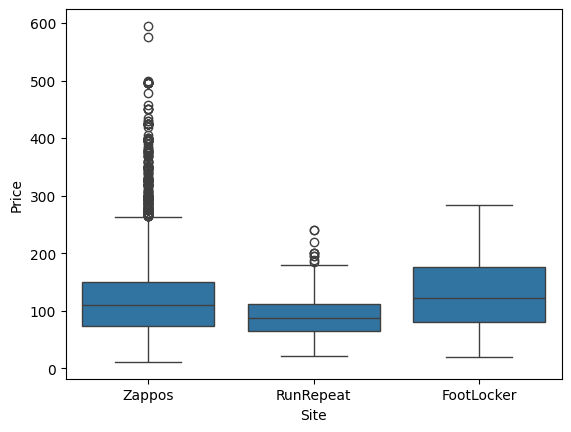

In [74]:
import seaborn as sns
sns.boxplot(data=df, x='Site', y='Price')

Average rating and price per site

In [75]:
df.groupby('Site')[['Price', 'Rating']].mean()

,Price,Rating
Site,,
FootLocker,127.334617,4.502732
RunRepeat,89.859100,4.338748
Zappos,121.813579,4.017832


Most common shoes across sites

In [76]:
df['name_clean'] = df['Name'].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
df['name_clean'].value_counts().head()

,count
name_clean,
nike zoom vomero 5,8
adidas handball spezial,6
vans authentic,6
nike dunk low,6
new balance 1906r,6


Correlation between price and rating

In [77]:
df[['Price', 'Rating']].corr()

,Price,Rating
Price,1.000000,0.021659
Rating,0.021659,1.000000


Top-rated shoes by site

In [78]:
df.sort_values(['Site', 'Rating'], ascending=[True, False]).groupby('Site').head(5)

,Name,Price,Rating,Site,name_clean
28,adidas adilette 22 slide,67.49,5.00,FootLocker,adidas adilette 22 slide
29,adidas adilette aqua,26.99,5.00,FootLocker,adidas adilette aqua
30,adidas adilette aqua slides,29.69,5.00,FootLocker,adidas adilette aqua slides
39,adidas adistar cushion 3,187.64,5.00,FootLocker,adidas adistar cushion 3
48,adidas adizero aruku,148.49,5.00,FootLocker,adidas adizero aruku
4012,nike sb vertebrae,65.00,4.85,RunRepeat,nike sb vertebrae
4044,nike zoom vomero 5,82.00,4.85,RunRepeat,nike zoom vomero 5
192,adidas ozweego,45.00,4.75,RunRepeat,adidas ozweego
3871,nike air force 1 07 lv8,70.00,4.75,RunRepeat,nike air force 1 07 lv8
79,adidas campus 00s,35.00,4.70,RunRepeat,adidas campus 00s


Lowest price per site

In [79]:
site_counts = df.groupby('Name')['Site'].nunique()

multi_site_shoes = site_counts[site_counts > 1].index

multi_site_df = df[df['Name'].isin(multi_site_shoes)]

cheapest_prices = multi_site_df.loc[multi_site_df.groupby('Name')['Price'].idxmin()]

result = cheapest_prices[['Name', 'Price', 'Site']].sort_values(by='Name')

print(result)

                             Name  Price       Site
31    adidas adilette aqua slides  18.00     Zappos
79              adidas campus 00s  35.00  RunRepeat
118                adidas gazelle  45.00  RunRepeat
153       adidas handball spezial  55.00  RunRepeat
248               adidas samba og  41.00  RunRepeat
...                           ...    ...        ...
6303               vans authentic  37.36     Zappos
6339               vans knu skool  40.00  RunRepeat
6359               vans old skool  45.00  RunRepeat
6369                  vans sk8-hi  71.35     Zappos
6528              xero shoes prio  67.00  RunRepeat

[145 rows x 3 columns]


In [80]:
multi_site_df

,Name,Price,Rating,Site,name_clean
30,adidas adilette aqua slides,29.69,5.00,FootLocker,adidas adilette aqua slides
31,adidas adilette aqua slides,18.00,5.00,Zappos,adidas adilette aqua slides
78,adidas campus 00s,87.75,5.00,FootLocker,adidas campus 00s
79,adidas campus 00s,35.00,4.70,RunRepeat,adidas campus 00s
80,adidas campus 00s,121.49,5.00,FootLocker,adidas campus 00s
...,...,...,...,...,...
6369,vans sk8-hi,71.35,4.00,Zappos,vans sk8hi
6370,vans sk8-hi,74.95,5.00,Zappos,vans sk8hi
6371,vans sk8-hi,75.00,5.00,Zappos,vans sk8hi
6527,xero shoes prio,68.39,5.00,Zappos,xero shoes prio


In [81]:
lowest_price_counts = cheapest_prices['Site'].value_counts()
print(lowest_price_counts)

Site
RunRepeat     116
Zappos         22
FootLocker      7
Name: count, dtype: int64


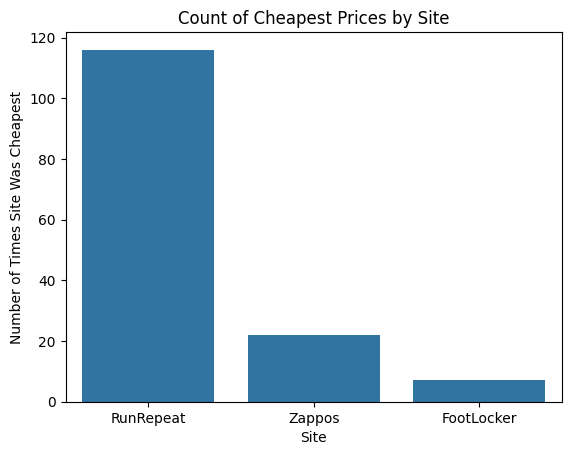

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=lowest_price_counts.index, y=lowest_price_counts.values)
plt.title("Count of Cheapest Prices by Site")
plt.ylabel("Number of Times Site Was Cheapest")
plt.xlabel("Site")
plt.show()

Average price difference between sites (same shoes only)

In [83]:
multi_site_with_min = multi_site_df.merge(
    cheapest_prices[['Name', 'Price']].rename(columns={'Price': 'MinPrice'}),
    on='Name'
)

multi_site_with_min['PriceDifference'] = multi_site_with_min['Price'] - multi_site_with_min['MinPrice']

avg_diff = multi_site_with_min[multi_site_with_min['PriceDifference'] > 0].groupby('Site')['PriceDifference'].mean()
print(avg_diff)


Site
FootLocker    71.773458
RunRepeat      7.819000
Zappos        29.424063
Name: PriceDifference, dtype: float64


Price distribution of same shoes per site

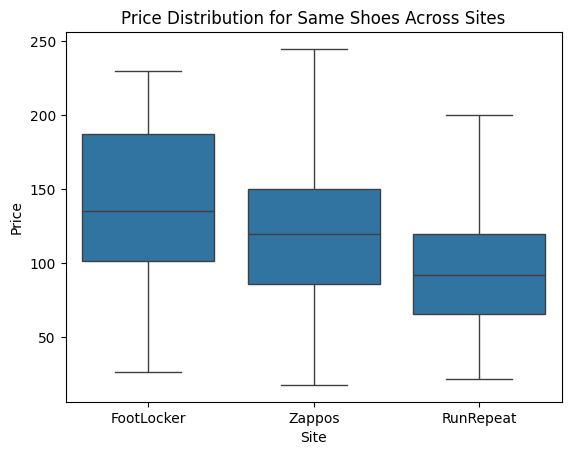

In [84]:
sns.boxplot(data=multi_site_df, x='Site', y='Price')
plt.title("Price Distribution for Same Shoes Across Sites")
plt.show()

Price vs Rating

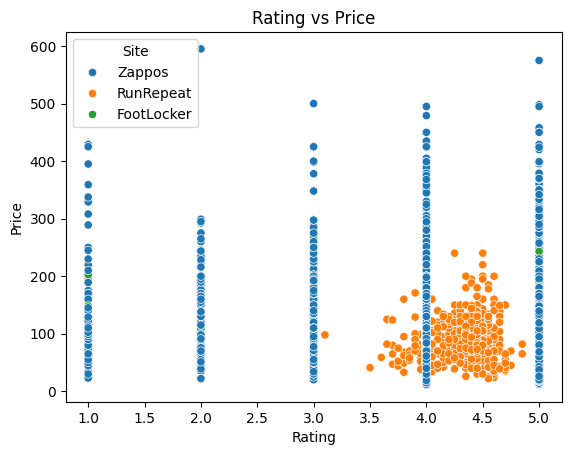

In [85]:
sns.scatterplot(data=df, x='Rating', y='Price', hue='Site')
plt.title("Rating vs Price")
plt.show()

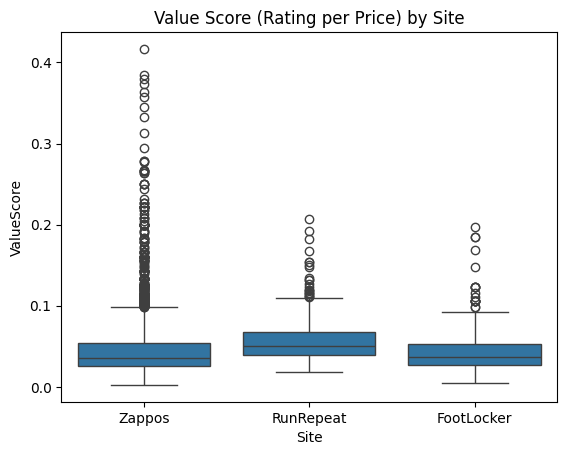

In [86]:
df['ValueScore'] = df['Rating'] / df['Price']
sns.boxplot(data=df, x='Site', y='ValueScore')
plt.title("Value Score (Rating per Price) by Site")
plt.show()
